# BIOEN 455 Lab 2 Winter 2025: Fluid Dynamics in Microfluidic Devices
## By Sam Koplik and Ayo Olanrewaju (Jan 2025)

### Objective:
Understand the principles of flow resistance, capillary pressure, and volume in microfluidic devices. Analyze the behavior of simple microchannels using this Python script and compare the experimental measurements of drain time to the theoretical ones determined computationally.

### Instructions
- Part 1 (hands-on experiments), should be done first, as there is some waiting time involved.
- Complete code anywhere with a "TODO:" marked. Be sure to save your work frequently!
- Parts 2-7 should be done in order and can be completed after lab.

### Submission Guidelines
- Put your name and date in the next cell 
- When finished, download and submit your modified script on Canvas as pdf (File> Save and Export Notebook As > PDF)
- <font color="red">Answer reflection questions (in red).</font> This can be completed after lab. You can type this in a markdown within this script.

## Name:
## Date:

# Part 1: Measuring drain time for microchannels of different dimensions

### Objective:
You will measure and record the drain time of liquids in microfluidic channels with different dimensions. In Parts 2-7, you will calculate the theoretical drain times and compare them with the experimental results, exploring the effects of microchannel dimensions and liquid properties on flow behavior in microfluidic systems. Each chip has 6 channels, and you will conduct two replicates per channel using a pre-mixed dye solution containing a surfactant.

### Channel CAD and Dimensions

Here we have provided some CAD images of these simple microchannels and have provided the dimensions below. These chips contain simple rectangular channels. You will measure and record drain time for each channel, and compare the measured values to the theoretical ones later on in the lab. We also have provided you space in this table to record drain times.  We recommend also writing these measurements down outside of this notebook to avoid any saving issues and loss of data.


| Channel # | Length (mm) | Width (µm) | Height (µm) | Drain Time Replicate 1 (s) | Drain Time Replicate 2 (s) |
|-----------|------------|-----------|------------|----------------------------|----------------------------|
| Channel 1 | 450        | 600       | 600        |                            |                            |
| Channel 2 | 1350       | 600       | 600        |                            |                            |
| Channel 3 | 450        | 600       | 200        |                            |                            |

- <font color="blue">**need to add cad in</font>



### Materials
- Microfluidic chip. Each chip has 6 channels (2 replicates of each) and has a cover tape applied.
- Pre-mixed dye solution (with 20% Tween surfactant)
- Pipette dropper
- Petri dish
- Gloves
- Timer or stopwatch
- Lab notebook or data sheet

## Procedure

### Preparation
1. **Setup:** Lay out the microfluidic chips on a flat surface within a Petri dish. 
2. **Pre-mixed Dye Solution:** The dye solution provided contains 20% Tween surfactant to avoid the need for plasma treatment by reducing surface tension and enhancing flow through the channels. Ensure the solution is well mixed before use.

### Loading the Channels
1. **Glove Up:** Wear gloves as part of standard lab safety and best practices to prevent contamination and ensure a sterile environment.
2. **Apply Cover Tapes:** Ensure the microfluidic channels are properly sealed with cover tapes.
3. **Filling Channels:** Using a pipette dropper, carefully introduce the pre-mixed dye solution into each channel of the chip. Introduce an equal volume into each channel to maintain consistency.

### Measuring Drain Time
1. **Timing:** Start the timer as soon as the dye solution is fully introduced into a channel.
2. **Observation:** Monitor the flow of the dye through the channel until it exits completely or the channel is fully drained.
3. **Recording:** Record the time taken for each channel to drain. We suggest recording these times both in this notebook (in the table provided) and elsewhere to avoid any data loss. 
4. **Repeat for Replicates:** Repeat the process for each of the 6 channels on the chip (2 replicates for each channel type).

### Clean-Up
1. **Disposal:** Dispose of any remaining dye solution according to lab safety protocols.
2. **Cleaning:** Rinse the microfluidic chips and Petri dish with distilled water.
3. **Gloves:** Dispose of used gloves in the appropriate waste bin.

## Safety and Quality Control
- Double-check that all channels are properly sealed with cover tapes and dye solution mixed before starting measurements.
- Always wear gloves to adhere to standard lab safety protocols.

- <font color="blue">**AYO Add more details here regarding specific experiment protocols</font>


## <font color="red">  Relfection Question 1 </font>
### <font color="red">Based on the observations from the plot, how could you minimize experimental errors in future measurements? What improvements could be made to your experimental setup to improve accuracy? Reflect on the sources of potential errors, such as inconsistencies in measurements, environmental factors, or equipment limitations, and suggest ways to address them in future experiments </font> 

### TODO: Answer Reflection Question 1 here

# Part 2: Flow Resistance Calculation
Here, we provide the equation describing flow resistance in a rectangular microchannel. We have provided you the function for flow resistance (you do not need to modify this, just run the cells).

![alt text](images/resistance.png)


Figure from: Ainla, A. (2013). The Multifunctional Pipette. A Microfluidic Technology for the Biosciences.

In [1]:
#You do not need to modify this cell, just run as is

#import packages
import numpy as np

### CONSTANTS - in SI units
# Properties of liquid
viscosity = 8.9e-4  #Pa*s

# Surface tension of water is 0.073
surfTension = 0.073  #N/meter

#width and height dimensions
w = 600e-6  #meters    
h = 600e-6 #meters 
l = 450e-3 #meters 

#contact angle measurement, in radians
#hydrophobic top PDMS surface and hydrophilic side and bottom surfaces respectively
thetaTopWall = (np.pi * 107.3/180)      #contact angle measurement after plasma treatment, in radians
thetaSideWalls = (np.pi * 30.95/180)    #waterwash resin 4min plasma treatment   

In [2]:
#You do not need to modify this cell, just run as is
#FLOWRES
def flowResistance(w,h,l,viscosity):
    viscosity = 8.9e-4  #Pa*s
    h_actual = min(w,h)
    w_actual= max(w,h)
    flowRes = ((12*viscosity*l)/(1-0.63*(h_actual/w_actual)))*(1/(w_actual*(h_actual**3)))
    return flowRes

## Call the flowResistance function using the default constants defined for you already. </font>

In [1]:
#TODO: call the flowResistance function using the default constants and variables, print results


## <font color="red"> Refletion Question 2 </font>
### <font color="red"> Based on the equation for rectangular flow resistance, how do you expect changes in the height and length of a microfluidic channel to impact the flow resistance? Specifically, which of these two parameters (height or length) would you expect to have a greater effect on flow resistance, and why? </font>

### TODO: Answer reflection question 2


# Part 3: Capillary Pressure Function</font>

In the figure below is the Young-Laplace Equation describing the capillary pressure of a rectangular microchannel. P is the capillary pressure, γ is the surface tension of liquid in the microchannel, and h, w, are the channel height and width respectively. θt, θb, θr, θl, are the top, bottom, right, and left channel wall contact angles, respectively. 

Given the Young-Laplace Equation describing the capillary pressure of a rectangular microchannel, write the capPressure function.  The function should take in w, h, thetaTopWall, thetaSideWalls, and surfTension and return capPressure.  Assume thetaTopWall as equivalent to θt, and thetaSideWalls as equivalent to θb, θr, and θl.  


<img src="images/c8lc00458g-t1_hi-res.gif" width="600" />

<img src="images/Screenshot_res.png" width="300" />

Adapted from Olanrewaju et al, 2018, Lab Chip,  https://doi.org/10/gk8xks and Olanrewaju et al, 2016, Lab Chip. https://doi.org/10.1039/C6LC00764C

In [3]:
# CAPPRESSURE
def capPressure(w, h, thetaTopWall, thetaSideWalls,surfTension):
    #TODO: Capillary pressure calculation for wetting liquid
    #hint use "np.cos(angle)"to call a cosine function
    #fill in function here
    return capPres

Call the capPressure function using the default constants defined for you already. </font>

In [5]:
#TODO: call the capPressure function using the default constants and variables, print results


## <font color="red"> Refletion Question 3 </font>
### <font color="red">How do fluid properties such as contact angle, viscosity, and surface tension influence fluid flow in rectangular microchannels? In your answer, explain the role of these properties in determining capillary pressure and flow resistance within microfluidic systems, and discuss their implications for microfluidic device performance.</font>

### TODO: Answer reflection question 3



# Part 4: Flow Rate Function</font>

Given that we have already defined functions for capillary pressure and flow resistance in a microchannel, using electrical analogies we can now use these two values to define a flow rate function (ie. using R and Q in the formula below). </font>

<img src="images/c8lc00458g-t7_hi-res.gif" width="600" />





In [17]:
def flowRate(calc_cap_pres,totalFlowRes):
    #TODO: flowRate function

    return flowrate

<font size="4">  Call the flowrate function using the results from running the capPressure function and flowResistance function with the default variables. </font>

In [18]:
#TODO: call the flowrate function using the default constants and variables, print results


# Part 5: Volume and Drain Time Functions</font>

These are pretty self explanatory. Using the resulting flow rate calculation and volume calculation, fill out the function for drain time. Note if you have a negative flow rate value, this indicates that the flow is moving in the opposite direction of the reference direction, you will need to account for this in your drainTime function (after all, time cannot be negative).



In [4]:
# VOLUME
def Volume(w,h,l):
    V = w*h*l
    return V

In [20]:
def drainTime(flowrate,vol):
    #TODO: use the resulting volume and flow rate calculation to write a function that returns drain time.
    return time

Call the Volume and drainTime functions ith the default variables.  </font>

In [21]:
#TODO: call the volume and drainTime functions, print results


# Part 6: Theoretical Drain Time Analysis with Varying Microchannel Dimensions</font>
In part 1.1, you measured and recorded drain time for each of these channels. Your task is to calculate the theoretical drain time for these channels using the functions you completed in parts 2-5.



## Microchannel 1
- Dimensions of microfluidic channels
    - width: 600µm
    - length: 450mm
    - height: 600µm

In [8]:
#TODO: adjust dimensions:length, width and height dimensions of microchannel 1
w = 1 #meters    
h = 1 #meters 
l = 1 #meters 

#Constants for water in SI units
thetaTopWall = (np.pi * 107.3/180)  #in radians  
thetaSideWalls = (np.pi * 30.95/180) 
viscosity = 8.9e-4  #Pa*s
surfTension = 0.073  #N/meter

#TODO: Call flowResistance, capPressure. flowRate, Volume, and drainTime functions after changing the dimensions to that of microchannel 1. 

## Microchannel 2
- Dimensions of microfluidic channels
    - width: 600µm
    - length: 1350mm
    - height: 600µm

In [4]:
#TODO: adjust dimensions:length, width and height dimensions of microchannel 2
w = 1 #meters    
h = 1 #meters 
l = 1 #meters 

#Constants for water in SI units
thetaTopWall = (np.pi * 107.3/180)  #in radians  
thetaSideWalls = (np.pi * 30.95/180) 
viscosity = 8.9e-4  #Pa*s
surfTension = 0.073  #N/meter

#TODO: Call flowResistance, capPressure. flowRate, Volume, and drainTime functions after changing the dimensions to that of microchannel 2. 

## Microchannel 3
- Dimensions of microfluidic channels
    - width: 600µm
    - length: 450mm
    - height: 200µm

In [5]:
#TODO: adjust dimensions:length, width and height dimensions of microchannel 3
w = 1 #meters    
h = 1 #meters 
l = 1 #meters 

#Constants for water in SI units
thetaTopWall = (np.pi * 107.3/180)  #in radians  
thetaSideWalls = (np.pi * 30.95/180) 
viscosity = 8.9e-4  #Pa*s
surfTension = 0.073  #N/meter

#TODO: Call flowResistance, capPressure. flowRate, Volume, and drainTime functions after changing the dimensions to that of microchannel 3. 

# Part 7: Analyze recorded vs theoretical drain times for different microchannels

In part 1.1 you recorded the drain times for three different rectangular microchannels and in part 6 you calculated the theoretical drain times.

Here we would like you to plot the recorded drain times versus the theoretical drain times for each microchannel. We have provided the skeleton code for necessary plotting, you are just responsible for inputting your data for the recorded and theoretical drain times. 


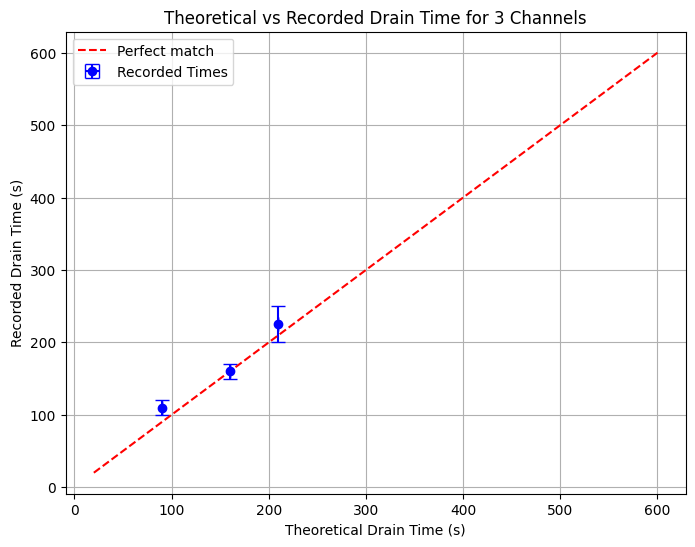

In [14]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Define your data for recorded and theoretical drain times with replicates for each of the 3 channels
# TODO: (replace example data with your actual recorded and theoretical drain times for each replicate)
recorded_times_channel1 = np.array([100, 120])  # Replicates for Channel 1
recorded_times_channel2 = np.array([150, 170])  # Replicates for Channel 2
recorded_times_channel3 = np.array([200, 250])  # Replicates for Channel 3

theoretical_times_channel1 = 90  # Theoretical value for Channel 1 (no replicates)
theoretical_times_channel2 = 160  # Theoretical value for Channel 2
theoretical_times_channel3 = 210  # Theoretical value for Channel 3

# Calculate means and standard deviations for recorded times for each channel
mean_recorded = [np.mean(recorded_times_channel1), np.mean(recorded_times_channel2), np.mean(recorded_times_channel3)]
std_dev_recorded = [np.std(recorded_times_channel1), np.std(recorded_times_channel2), np.std(recorded_times_channel3)]

# Theoretical times (single values for each channel)
theoretical_times = [theoretical_times_channel1, theoretical_times_channel2, theoretical_times_channel3]

# Plot the theoretical vs recorded drain times with error bars
plt.figure(figsize=(8,6))

# Plot for Recorded Times (with error bars)
plt.errorbar(theoretical_times, mean_recorded, xerr=0, yerr=std_dev_recorded, fmt='o', color='blue', label='Recorded Times', capsize=5)

# Add the line for perfect match
plt.plot([20, 600], [20, 600], color='red', linestyle='--', label='Perfect match')

# Labeling the axes and the plot
plt.xlabel('Theoretical Drain Time (s)')
plt.ylabel('Recorded Drain Time (s)')
plt.title('Theoretical vs Recorded Drain Time for 3 Channels')
plt.legend()
plt.grid(True)
plt.show()


## <font color="red">Reflection Question 4</font>
### <font color="red">How did the recorded drain times compare to the theoretical drain times? What could explain any discrepancies between the two? Consider factors like fluid properties, channel dimensions, and surface interactions that may affect the drain time. How could these factors be better controlled or accounted for in the theoretical calculation of drain time?</font>
### TODO: Answer Reflection Question 4 here